# CISC/CMPE 452/COGS 400 Assignment 1 - Perceptron (10 points)  

Please put your name and student id here

    Sam Alexander, #20158924

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Make sure to restart and run all the cells from the beginning before submission. Do not clear out the outputs.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted)



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# load dataset
df_train = pd.read_csv('data/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('data/test.txt', names=['Text', 'Emotion'], sep=';')

In [6]:
x_train = df_train['Text']
y_train = df_train['Emotion']

x_test = df_test['Text']
y_test = df_test['Emotion']

df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

## Data Preprocessing

In [8]:
# encode label
y_train = y_train.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})
y_test = y_test.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)#, stop_words='english')

# We transform each text into a vector
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [21]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix, accuracy, precision, recall and f1
    # DO NOT use any python packages such as scikit-learn
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    
    #confusion matrix
    for i in range(len(y_test)):
        if (y_pred[i] == 1):
            if (y_test[i] == 1):  #truepositive
                true_positive += 1
            else:
                false_positive += 1 #false positive
        else:
            if (y_test[i] == 1): #false negative
                false_negative += 1
            else:
                true_negative += 1 #true negative
                
    print("True Positives:", true_positive, "\t\tFalse Positives:", false_positive, "\n")
    print("False Negatives:", false_negative, "\t\tTrue Negative:", true_negative, "\n")
    
    #accuracy
    acc = (true_positive+true_negative)/len(y_test)*100
    print("The accuracy was %.2f" % acc, "%\n")
    
    #precision
    prec = (true_positive)/(true_positive + false_positive)*100
    print("The precision was %.2f" % prec, "%\n")
    
    #recall
    rec = (true_positive)/(true_positive + false_negative)*100
    print("The recall was %.2f" % rec, "%\n")
    
    #f1 score
    f1 = 2*(true_positive)/(2*true_positive + false_positive + false_negative)*100
    print("The F1 score was %.2f" % f1, "%")

    ####################################################################################################

In [11]:
class SimpleFeedbackLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
        fx = -1*self.b[0]
        for index, value in enumerate(x):
            fx = fx + self.W[index]*value
        ####################################################################################################
        return fx
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10, verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)

        for i in range(n_iters):
            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                output = 0
                if self.f(xi) >= 0: output = 1
                ####################################################################################################

                ####################################################################################################
                # 2. enter code here to adjust the weights and bias
                error = yi-output # neg if false positive, pos if false negative
                
                for index, value in enumerate(xi):
                    self.W[index] = self.W[index] + learning_rate*value*error   
                
            self.b[0] = self.b[0] + learning_rate*error 
                ####################################################################################################
            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train acc %.4f, test acc %.4f' % (i + 1, train_acc, test_acc))
        
    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        y_pred = np.zeros(len(x))
        for index, value in enumerate(x):
            prediction = 0
            if (self.f(value) >= 0):
                prediction = 1
            y_pred[index] = prediction
        ####################################################################################################
        return y_pred

In [12]:
####################################################################################################
# enter code here to initialize and train the model
model1 = SimpleFeedbackLearning()

model1.train(x_train,y_train,x_test,y_test)

####################################################################################################

epoch 1, train acc 0.9354, test acc 0.9120
epoch 2, train acc 0.9499, test acc 0.9125
epoch 3, train acc 0.9651, test acc 0.9280
epoch 4, train acc 0.9670, test acc 0.9350
epoch 5, train acc 0.9671, test acc 0.9375
epoch 6, train acc 0.9714, test acc 0.9420
epoch 7, train acc 0.9766, test acc 0.9455
epoch 8, train acc 0.9791, test acc 0.9465
epoch 9, train acc 0.9792, test acc 0.9455
epoch 10, train acc 0.9821, test acc 0.9490


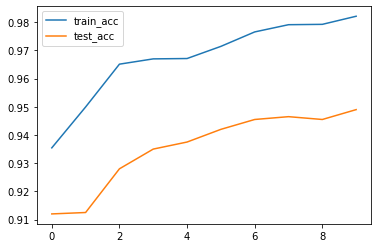

In [13]:
# plot the accuracy
plt.plot(model1.history['train_acc'], label='train_acc')
plt.plot(model1.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [22]:
####################################################################################################
# enter code here to evaluate the model with the evaluator function
#Given the accuracy of the perceptron i created above (>95%, I will use it here to be evaluated as my custom learning rate/# of epochs)
#However, if I were to test another value set, it would be as follows:

#model2 = SimpleFeedbackLearning()
#model2.train(x_train,y_train,x_test,y_test,learning_rate = alpha, n_iters = beta)
#y_guess = model2.predict(x_test)
#evaluator(y_test,y_guess)



y_guess = model1.predict(x_test)
evaluator(y_test,y_guess)

####################################################################################################

True Positives: 864 		False Positives: 46 

False Negatives: 56 		True Negative: 1034 

The accuracy was 94.90 %

The precision was 94.95 %

The recall was 93.91 %

The F1 score was 94.43 %
